# Implementation of Shapiro's chapter 8 section 8.9

### Combined friction and heat transfer

Constant Pipe Temperature

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


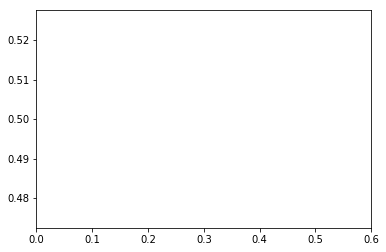

In [28]:
import pint
import numpy as np
import matplotlib.pyplot as plt
u = pint.UnitRegistry()
#from scipy.integrate import solve_ivp
cp = 1000 * u.joule / u.kilogram / u.kelvin
k = 1.4
f = 0.005 #friction factor
D = 0.025 * u.meter
M0 = 0.5
#T0 = 350 * u.kelvin
ReynoldAnalogy = True
T02_T01 = 1.05
x0 = 0 * u.meter
Tw0_T01 = 4

def F_T0(M):
    FT0 = M**2*(1+k*M**2)*(1+(k-1)/2*M**2)/(1-M**2)
    return FT0

def F_f(M):
    Ff = k*M**4*(1+(k-1)/2*M**2)/(1-M**2)
    return Ff

def dM2(M):
    _x_1 = x0
    _M_1 = M
    if ReynoldAnalogy:
        _x2 = D / (2 * f) * np.log((Tw0_T01-1)/(Tw0_T01-T02_T01)) + _x_1
        _M_2 = _M_1 + 0.05
        converged = False
        while not converged:
            Mbar = (_M_1+_M_2) / 2
            Fbar_T0 = F_T0(Mbar)
            Fbar_f = F_f(Mbar)
            M2 = np.sqrt(_M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*Tw0_T01-T02_T01-1)))
            #print(M2)
            if (np.abs(_M_2-M2)>0.0001):
                _M_2 = M2 - 0.000001
            else:
                converged = True
    return M2,_x2

fxD = np.zeros((101,7))
MM = np.zeros((101,7))

M = M0
fxD[0] = 4*f*x0/D
MM[0] = M0
for j in (range(6)):
    Tw0_T01 = j+1
    for i in range(100):
        M, x2 = dM2(M)
        x0 = x2
        MM[i+1,j+1] = M
        fxD[i+1,j+1] = 4*f*x0/D
    plt.plot(fxD[:,j+1],MM[:,j+1])
    
plt.xlim(0,0.6)

plt.show()
    

In [22]:
a = np.zeros((2,3))

In [26]:
a[0,1]

0.0